In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

# Load CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

# Normalize images
x_train, x_test = x_train / 255.0, x_test / 255.0

# Define model architecture
model = keras.Sequential([
    keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

# Compile model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=30, batch_size=32, validation_split=0.2)

# Save trained model
model.save("cifar10_cnn_model.h5")


Epoch 1/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 129s 102ms/step - accuracy: 0.3395 - loss: 1.7799 - val_accuracy: 0.4854 - val_loss: 1.4060
Epoch 2/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 103ms/step - accuracy: 0.5533 - loss: 1.2452 - val_accuracy: 0.6039 - val_loss: 1.1118
Epoch 3/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 142s 103ms/step - accuracy: 0.6227 - loss: 1.0715 - val_accuracy: 0.6394 - val_loss: 1.0347
Epoch 4/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 130s 104ms/step - accuracy: 0.6585 - loss: 0.9706 - val_accuracy: 0.6447 - val_loss: 0.9972
Epoch 5/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 137s 100ms/step - accuracy: 0.6960 - loss: 0.8600 - val_accuracy: 0.6756 - val_loss: 0.9355
Epoch 6/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 144s 102ms/step - accuracy: 0.7125 - loss: 0.8035 - val_accuracy: 0.6835 - val_loss: 0.9030
Epoch 7/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 143s 103ms/step - accuracy: 0.7392 - loss: 0.7447 - val_accuracy: 0.6611 - val_loss: 0.9727
Epoch 8/30
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 138s 100ms/step - ac

Model loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


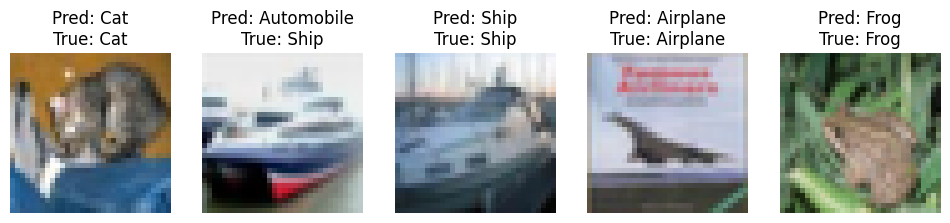

In [11]:
import matplotlib.pyplot as plt
import numpy as np

# Load trained model
loaded_model = keras.models.load_model("cifar10_cnn_model.h5")
print("Model loaded successfully!")

# CIFAR-10 class names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

def test_model(model, images, labels, num_samples=5):
    predictions = model.predict(images[:num_samples])
    plt.figure(figsize=(12, 6))

    for i in range(num_samples):
        plt.subplot(1, num_samples, i + 1)
        plt.imshow(images[i])
        plt.title(f"Pred: {class_names[np.argmax(predictions[i])]}\nTrue: {class_names[labels[i][0]]}")
        plt.axis("off")

    plt.show()

# ทดสอบโมเดล
test_model(loaded_model, x_test, y_test, num_samples=5)
